In [1]:
import matplotlib.pyplot as plt

import sys
import numpy as np
import pandas as pd

sys.path.append("/home/chenga/software/matplotlib-chord-diagram")
from mplchord import chordDiagram, hex2rgb

In [2]:
def parse_results(data, nodes, f_results, dtype):
    
    if dtype == "inter":
        with open(f_results, "r") as f:
            for line in f:
                row = line.strip("\r\n").split("\t")
                t1, t2, count = row[0], row[1], int(row[2])
                
                i = nodes.index("inter-"+t1)
                j = nodes.index("inter-"+t2)
                
                if i == j:
                    data[i,j] += count
                else:
                    data[i,j] += count
                    data[j,i] += count
                
    elif dtype == "intra":
        with open(f_results, "r") as f:
            for line in f:
                row = line.strip("\r\n").split("\t")
                t1, t2, count = row[0], row[1], int(row[2])

                if t1 == "intergenic" or t2 == "intergenic":
                    continue
                
                i = nodes.index("intra-"+t1)
                j = nodes.index("intra-"+t2)

                if i == j:
                    data[i,j] += count
                else:
                    data[i,j] += count
                    data[j,i] += count
    
    return data

In [3]:
def plot_overall_circos(f_inter, f_intra):

    nodes = ["inter-five_prime_utr", "inter-exon", "inter-three_prime_utr", "inter-intron", "inter-intergenic",
            "intra-five_prime_utr", "intra-exon", "intra-three_prime_utr", "intra-intron"]
    labels = ["5'UTR (t)", "Exon (t)", "3'UTR (t)", "Intron (t)", "Intergenic (t)",
            "5'UTR (c)", "Exon (c)", "3'UTR (c)", "Intron (c)"]

    data = np.array(np.zeros((len(nodes), len(nodes))))

    data = parse_results(data, nodes, f_inter, "inter")
    data = parse_results(data, nodes, f_intra, "intra")

    # Plot Circos
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes([0,0,1,1])

    colors = ["#c23f76", "#156697", "#f2cc21", "#9994c2", "#34a198",
                "#5b5b6d", "#9e1f63", "#a0522d", "#f99533", "#269c62"]
    colors = [ hex2rgb(x) for x in colors ]
    nodePos = chordDiagram(data, ax, colors=colors)
    ax.axis('off')

    prop = dict(fontsize=16*0.8, ha='center', va='center')

    for i in range(len(nodes)):
        ax.text(nodePos[i][0], nodePos[i][1], labels[i], rotation=nodePos[i][2], **prop)

    for n, i in zip(nodes, data.sum(axis=1)/data.sum()):
        print("%-30s %.1f%%" % (n, i*100.0))

### KARR-seq (HEK293T)

inter-five_prime_utr           0.6%
inter-exon                     31.2%
inter-three_prime_utr          2.0%
inter-intron                   12.8%
inter-intergenic               27.8%
intra-five_prime_utr           0.4%
intra-exon                     13.5%
intra-three_prime_utr          1.2%
intra-intron                   10.5%


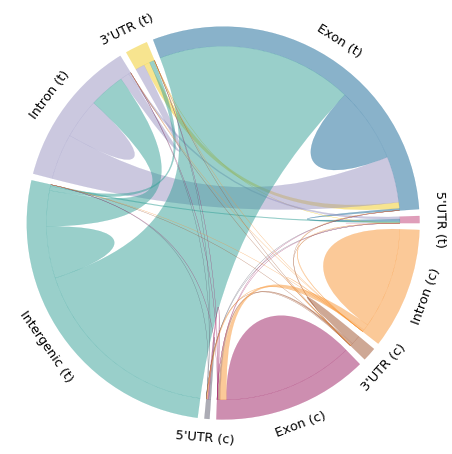

In [4]:
f_inter = "../analysis/annotations_circos/results/genomic-inter/hgenome+rRNA/G1_kethoxal-HEK293T_M13_B01_inter.txt"
f_intra = "../analysis/annotations_circos/results/genomic-inter/hgenome+rRNA/G1_kethoxal-HEK293T_M13_B01_intra.txt"
plot_overall_circos(f_inter, f_intra)

### PARIS (HEK293T)

inter-five_prime_utr           0.4%
inter-exon                     31.1%
inter-three_prime_utr          0.8%
inter-intron                   10.6%
inter-intergenic               37.3%
intra-five_prime_utr           0.2%
intra-exon                     14.9%
intra-three_prime_utr          0.6%
intra-intron                   4.0%


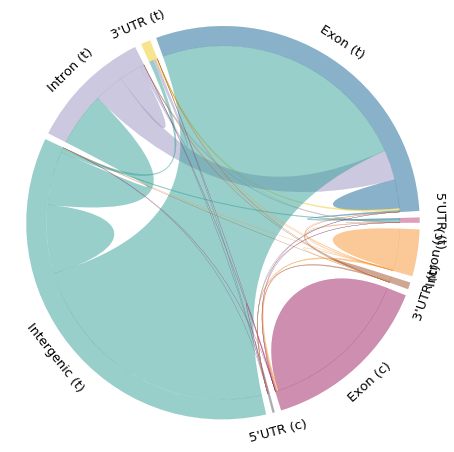

In [5]:
f_inter = "../analysis/annotations_circos/results/genomic-inter/hgenome+rRNA/PARIS-HEK293T_B97_B01_inter.txt"
f_intra = "../analysis/annotations_circos/results/genomic-inter/hgenome+rRNA/PARIS-HEK293T_B97_B01_intra.txt"
plot_overall_circos(f_inter, f_intra)

### RIC-seq (HeLa)

inter-five_prime_utr           0.6%
inter-exon                     8.0%
inter-three_prime_utr          3.2%
inter-intron                   29.7%
inter-intergenic               22.6%
intra-five_prime_utr           0.6%
intra-exon                     6.9%
intra-three_prime_utr          2.0%
intra-intron                   26.3%


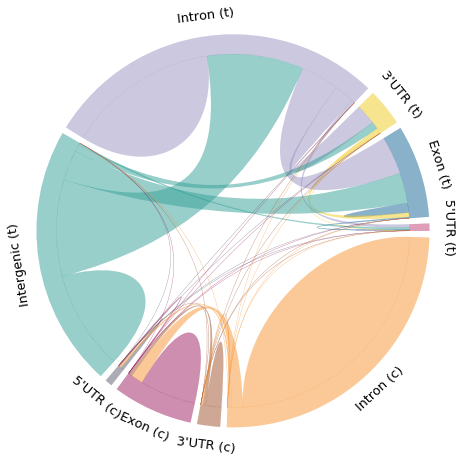

In [6]:
f_inter = "../analysis/annotations_circos/results/genomic-inter/hgenome+rRNA/RIC-HeLa-rRNA-_M94_B01_inter.txt"
f_intra = "../analysis/annotations_circos/results/genomic-inter/hgenome+rRNA/RIC-HeLa-rRNA-_M94_B01_intra.txt"
plot_overall_circos(f_inter, f_intra)